In [1]:
import sys
import os
sys.path.append('../')
import ghiaseddin

import numpy as np
import lasagne

%matplotlib inline

import matplotlib
import matplotlib.pylab as plt
from datetime import datetime as dt

Using gpu device 0: GeForce GTX TITAN Black (CNMeM is disabled, CuDNN 4007)


In [2]:
zappos1 = ghiaseddin.Zappos50K1(ghiaseddin.settings.zappos_root, attribute_index=0, split_index=0)
googlenet = ghiaseddin.GoogLeNet(ghiaseddin.settings.googlenet_weights)

In [3]:
model = ghiaseddin.Ghiaseddin(extractor=googlenet,
                              dataset=zappos1,
                              weight_decay=1e-5,
                              optimizer=lasagne.updates.rmsprop,
                              ranker_learning_rate=1e-4,
                              extractor_learning_rate=1e-5,
                              ranker_nonlinearity=lasagne.nonlinearities.linear,
                              train_batch_size=16)

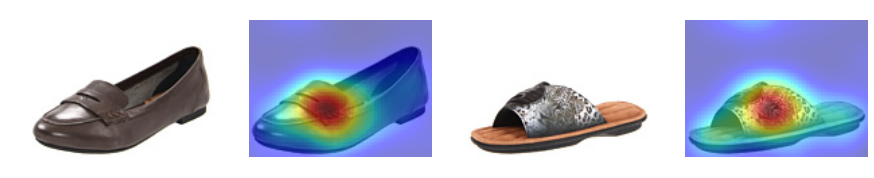

In [6]:
fig = model.generate_saliency([3])

88.67
91.00
91.67


KeyboardInterrupt: 

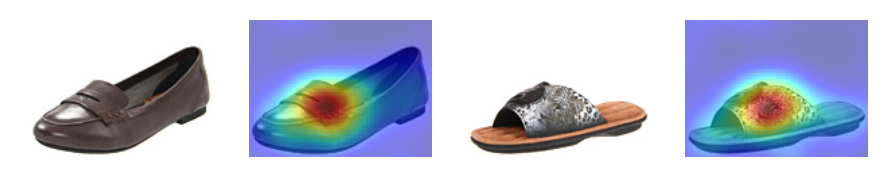

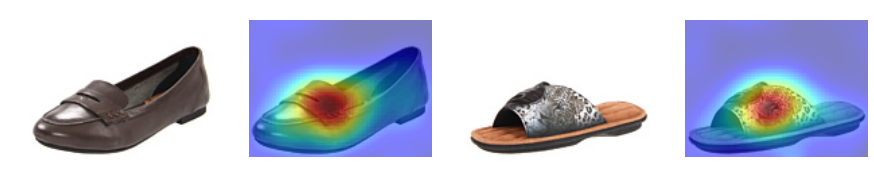

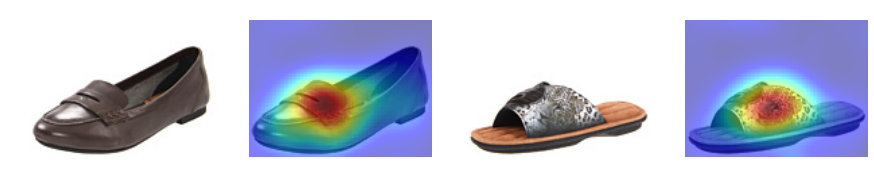

In [7]:
for i in range(25):
    l = model.train_one_epoch()
    sys.stdout.write("%2.2f\n" % (model.eval_accuracy() * 100))
    sys.stdout.flush()
    fig = model.generate_saliency([3])